# Ejercicio 9.4: Difusión Termica en la corteza terrestre

Un ejemplo clasico de un problema de difusión con condiciones de frontera varibles en el tiempo es la difusión del calor en la corteza de la Tierra, como la temperatura de la superficie varia con las temporadas. Suponga que la temperatura media diaria en un punto particular de la superficie varia como:

$$T_{0}(t)=A+Bsin\frac{2\pi t}{\tau }$$

donde $\tau =365dias$, $A=10^{\circ}C$ y $B=12^{\circ}C$. En la profundidad de $20m$ debajo de la superficie al menos toda la variacion de temperatura anual es subsanada y la temperatura es, en una buena aproximación, un constante $11^{\circ}C$ (el cual es mayor que la temperatura media de la superficie de $10^{\circ}C$ -la temperatura aumenta con la profundidad, debido a el calentamiento del nucleo caliente del planta). La difusividad termica de la corteza de la Tierra varia algo de lugar a lugar, pero para nuestro proposito la trataremos como una constante con el valor $D=0.1m^{2}dia^{-1}$.

Escriba un programa, o modifique uno de los dados en este capitulo, para calcular el perfil de temperatura de la corteza como una función de la profundidad a $20m$ y tiempo a $10 años$. Empiece con la temperatura en todos lados igual a $10^{\circ}C$, excepto en la superficie y el punto mas profundo, escoja valores para el numero de puntos de malla y el paso de tiempo, entonces corra su programa para los primeros nueve años simulados, para permitir que se establezca en cualquier patrón que alcance. Entonces para el decimo y final año imprima cuatro temperaturas tomadas un intervalo de 3 meses en una sola grafica para ilustrar como la temperatura cambia como una funcion de la profundidad y el tiempo.

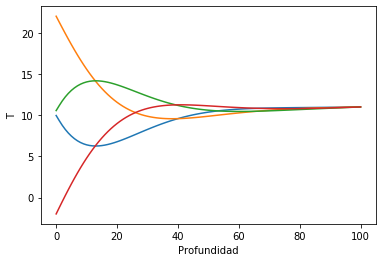

In [7]:
from numpy import empty
from pylab import plot,xlabel,ylabel,show,sin,imshow
from math import pi

#Constantes
L = 20              #Profundidad
D = 0.1             #Difusividad Termica
N = 100
a = L/N
h = 0.1
epsilon = h/100

A = 10
B = 12
tau = 365
def T0(t):
    return A + B*sin(2*pi*t/tau)

tmin = 365*9
t1 = tmin
t2 = tmin + 90
t3 = t2 + 90
t4 = t3 + 90
tend = t4 + epsilon

#Creando arrays
T = empty(N+1,float)
T[1:N] = 10
Tp = empty(N+1,float)
Tp[0] = A
Tp[N] = 11

#Bucle Principal
t = 0.0
c = h*D/(a*a)
while t<tend:
    
    #Calcular los nuevos valores de T
    T[0] = T0(t)
    T[N] = 11
    for i in range (1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    T,Tp = Tp,T
    t += h
    
    #Hacer grafico en los tiempos dados
    if abs(t-t1)<epsilon:
        plot(T)
    if abs(t-t2)<epsilon:
        plot(T)
    if abs(t-t3)<epsilon:
        plot(T)
    if abs(t-t4)<epsilon:
        plot(T)

xlabel("Profundidad")
ylabel("T")
show()

La grafica presenta un comportamiento aceptable ya que para cada uno de los trismestes la temperatura en el prundidad mas baja, es decir, a los $20m$ de profundidad todas las curvas se encuentran en un punto comun ($11^{\circ}C$). Dos de los trimestres empiezan en $10^{\circ}C$, debido a que por le comportamiento sinusoidal de la función de temperatura, el segundo termino se ve anulado para tiempos especificos en que $sin(t)=0$. A su vez los otros dos trimestres presentan temperaturas maximas y minimas, esto es debido igualmente a que la funcion seno encuentra valores de $sin(t)=1$ y $sin(t)=-1$ respectivamente. 